In [1]:
!pip install tensorflow-gpu==2.0.0-alpha0
!pip install tfp-nightly==0.7.0.dev20190519


In [0]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

import tensorflow_probability as tfp
tfd = tfp.distributions

%matplotlib inline



In [3]:
tf.__version__

'2.0.0-alpha0'

In [4]:

d = tfd.Normal(loc=[3], scale=1.5) #A
x = d.sample(2) # Draw two random points.
px = d.prob(x) # Compute density/mass.
print(x)
print(px)


tf.Tensor(
[[0.53797483]
 [2.195116  ]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.06915405]
 [0.23030108]], shape=(2, 1), dtype=float32)


### additional material

https://www.youtube.com/watch?v=BrwKURU-wpk  

https://medium.com/tensorflow/regression-with-probabilistic-layers-in-tensorflow-probability-e46ff5d37baf

In [5]:
if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


In [6]:
tf.__version__

'2.0.0-alpha0'

In [7]:
tfp.__version__

'0.7.0-dev20190519'

In [8]:
lala=tfd.Normal(loc=5,scale=6)
lala.log_prob(np.array([3,5,7]))

<tf.Tensor: id=49, shape=(3,), dtype=float32, numpy=array([-2.7662537, -2.7106981, -2.7662537], dtype=float32)>

In [63]:
np.random.seed(1) # Fixing the seed, so data generation is always the same
noise=3
s = 500  # Sequence length 
no_beats =25
a0 = 25
start = 3.14/2 
x_start=0


def gen_data(x_start, x_stop, start, noise, s, no_bums, no_beats ): # We create size observations 
  d = np.zeros((s,1))
  my_x = np.linspace(x_start, x_stop, s)
  d[:,0] = a0*np.sin(start + my_x) *   np.sin(start + np.linspace(0, no_bums*np.pi, s)) 
  d[:,0] = 0.2*my_x + d[:,0]
  d[:,0] = d[:,0]+   np.random.normal(0,noise,s)
  return my_x, d  # Funktionswerte der schwebugn


size_1 =2000
x_start=-50
x_stop=0
sin_start=3.14/2
X_1, Y_1= gen_data(x_start=x_start, x_stop=x_stop, start=sin_start, noise=noise, s=size_1,  no_bums=0.5, no_beats=0)
#plt.scatter(X_1, Y_1)
#plt.show()

size_2 =5000
x_start=0
x_stop=400
sin_start=3.14
X_2, Y_2= gen_data(x_start=x_start, x_stop=x_stop, start=sin_start, noise=noise, s=size_2,  no_bums=1.5, no_beats=0)
#plt.scatter(X_2, Y_2)
#plt.show()


X = np.concatenate((X_1,X_2))
Y = np.concatenate((Y_1,Y_2))

print(X.shape)
print(Y.shape)

#n1= np.where((X>10) & (X<95))
#print(sum(n1))
#
#X_new = np.delete(X,n1)
#Y_new = np.delete(Y,n1)
#
#print(X_new.shape)
#print(Y_new.shape)

(7000,)
(7000, 1)


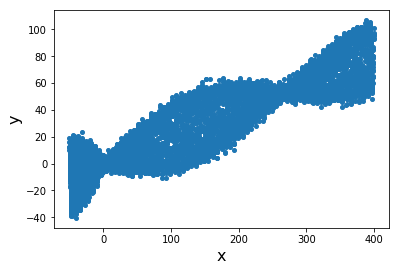

In [64]:

plt.scatter(X, Y,s=16)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)#
plt.show()

In [0]:
Y=Y/max(Y)
X=X/max(X)

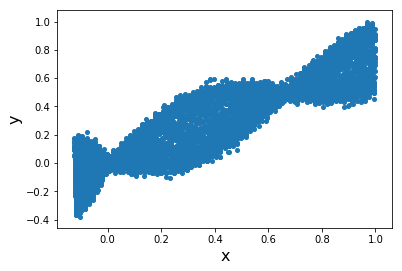

In [66]:

plt.scatter(X, Y,s=16)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)#
plt.show()

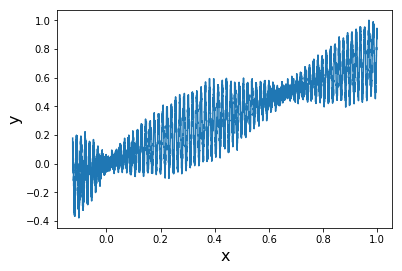

In [67]:

plt.plot(X, Y,)
plt.xlabel("x",size=16)
plt.ylabel("y",size=16)#
plt.show()

In [68]:
print(X.shape)
print(Y.shape)

(7000,)
(7000, 1)


In [0]:
x1=np.arange(0,10,0.05)
x2=np.repeat(10,20)
x3=x1[::-1]
x4=np.repeat(0,5)
x5=np.arange(0,20,0.05)
x6=x5[::-1]
x7=np.repeat(0,20)

x=np.concatenate([x1,x2,x3,x4,x5,x6,x7])


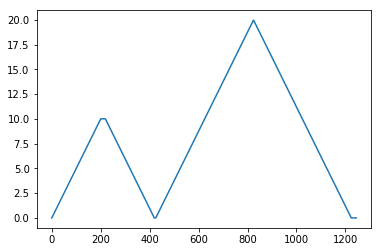

In [211]:
plt.plot(x)

In [0]:
noise=np.random.normal(0,x,len(x))

In [0]:
#noise

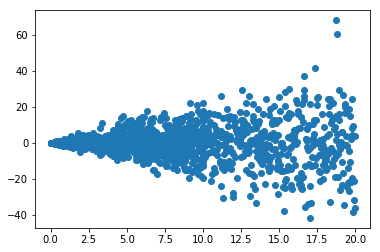

In [214]:
plt.scatter(x,noise)

In [0]:
x=np.linspace(-10,30,len(noise))


In [0]:
y=2.7*x+noise

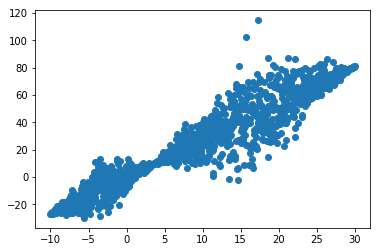

In [217]:
plt.scatter(x,y)

In [0]:
X=x
Y=y

In [219]:
y.shape

(1245,)

In [0]:

#negloglik = lambda y, rv_y: -rv_y.log_prob(y)#define negative loglike#neglog 
def negloglik(y,rv_y):
  return -rv_y.log_prob(y)

In [221]:
#Build model.
model = tf.keras.Sequential()
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(20,activation="relu",input_shape=(1,)))
model.add(tf.keras.layers.Dense(50,activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="relu"))
#model.add(tf.keras.layers.Dense(20,activation="relu",))
model.add(tf.keras.layers.Dense(2,activation="linear"))
model.add(tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],
                                                              scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2]))))
#model.add(tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],
  #                                                            scale=1e-3 + tf.math.exp( t[:,1:2]))))

### neu ist das softplus nun wird var mit modelliert)
model.summary()
# Do inference.
model.compile(optimizer=tf.optimizers.Adam(), loss=negloglik)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_24 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_25 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 42        
_________________________________________________________________
distribution_lambda_10 (Dist ((None, 1), (None, 1))    0         
Total params: 2,152
Trainable params: 2,152
Non-trainable params: 0
_________________________________________________________________


In [227]:
history=model.fit(X, Y, epochs=500,batch_size=32,verbose=1)


Epoch 1/500
1245/1245 [==============================] - 0s 103us/sample - loss: 3.3658
Epoch 2/500
1245/1245 [==============================] - 0s 103us/sample - loss: 3.3641
Epoch 3/500
1245/1245 [==============================] - 0s 115us/sample - loss: 3.3631
Epoch 4/500
1245/1245 [==============================] - 0s 105us/sample - loss: 3.3619
Epoch 5/500
1245/1245 [==============================] - 0s 103us/sample - loss: 3.3727
Epoch 6/500
1245/1245 [==============================] - 0s 103us/sample - loss: 3.3668
Epoch 7/500
1245/1245 [==============================] - 0s 105us/sample - loss: 3.3600
Epoch 8/500
1245/1245 [==============================] - 0s 103us/sample - loss: 3.3607
Epoch 9/500
1245/1245 [==============================] - 0s 106us/sample - loss: 3.3553
Epoch 10/500
1245/1245 [==============================] - 0s 104us/sample - loss: 3.3659
Epoch 11/500
1245/1245 [==============================] - 0s 119us/sample - loss: 3.3591
Epoch 12/500
1245/1245 [======

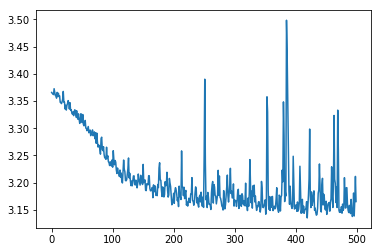

In [228]:
plt.plot(history.history["loss"])
#scheint so als würde es noch weiter runtergehen

In [229]:
model.evaluate(X,Y)

1245/1245 [==============================] - 0s 58us/sample - loss: 3.2276


3.2275971943116093

In [230]:
x_tst=X
x_tst=x_tst.reshape((len(x_tst),1))
x_tst.shape

(1245, 1)

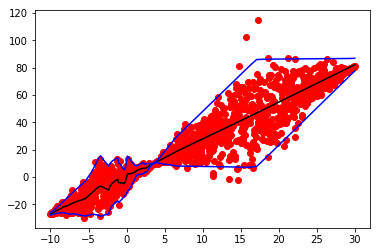

In [231]:

plt.scatter(X,Y,color="red")  #observerd #observe 
#for i in range(0,3):
 # plt.scatter(x_tst,model(x_tst).sample())
plt.plot(x_tst,model(x_tst).mean(),color="black")
plt.plot(x_tst,model(x_tst).mean()+2*model(x_tst).stddev(),color="blue")
plt.plot(x_tst,model(x_tst).mean()-2*model(x_tst).stddev(),color="blue")

In [0]:
####from tensorflow.keras.layers import Input, Dense
####from tensorflow.keras.models import Model
####
####
####kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x.shape[0] * 1.0)
####bias_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x.shape[0] * 1.0)
####
####
##### This returns a tensor
####inputs = Input(shape=(1,))
####
##### a layer instance is callable on a tensor, and returns a tensor
####
####
#####xx = tf.keras.layers.BatchNormalization()(inputs)
####
####
#####xx1 = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(inputs)
#####
#####xx1 = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx1)
#####
####xx1 = tfp.layers.DenseFlipout(30,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
####                           kernel_divergence_fn=kernel_divergence_fn,
####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(inputs)
####
####xx2 = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
####                           kernel_divergence_fn=kernel_divergence_fn,
####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(inputs)
####
####xx2 = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
####                           kernel_divergence_fn=kernel_divergence_fn,
####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx2)
####
####xx2 = tfp.layers.DenseFlipout(1,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
####                           kernel_divergence_fn=kernel_divergence_fn,
####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx2)
####
####lala=tf.keras.layers.Concatenate()([xx1,xx2])
####
####
#####
#####xx = tfp.layers.DenseFlipout(5,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####xx = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####xx = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####xx = tfp.layers.DenseFlipout(5,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####
#####
####
####
####
######xx = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
######xx = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####xx = tfp.layers.DenseFlipout(10,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####
#####
#####
#####xx = tfp.layers.DenseFlipout(100,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####xx = tfp.layers.DenseFlipout(50,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
#####
#####xx = tfp.layers.DenseFlipout(200,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
####
####
#####xx = tfp.layers.DenseFlipout(2,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
#####                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
#####                           kernel_divergence_fn=kernel_divergence_fn,
#####                           bias_divergence_fn=bias_divergence_fn,activation="linear")(lala)
####
####xx = tf.keras.layers.Dense(2)(lala)
####
####predictions = tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2])))(xx)
#####predictions = tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],scale=1))(xx)
####
####model = Model(inputs=inputs, outputs=predictions)
####model.summary()
##### Do inference.
####model.compile(optimizer=tf.optimizers.Adam(), loss=negloglik)

In [233]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


kernel_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x.shape[0] * 1.0)
bias_divergence_fn=lambda q, p, _: tfp.distributions.kl_divergence(q, p) / (x.shape[0] * 1.0)


# This returns a tensor
inputs = Input(shape=(1,))

# a layer instance is callable on a tensor, and returns a tensor
xx = tfp.layers.DenseFlipout(20,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(inputs)
xx = tfp.layers.DenseFlipout(50,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
xx = tfp.layers.DenseFlipout(20,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn,activation="relu")(xx)
xx = tfp.layers.DenseFlipout(2,bias_posterior_fn=tfp.layers.util.default_mean_field_normal_fn(),
                           bias_prior_fn=tfp.layers.default_multivariate_normal_fn,
                           kernel_divergence_fn=kernel_divergence_fn,
                           bias_divergence_fn=bias_divergence_fn)(xx)

predictions = tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[:, 0:1],scale=1e-3 + tf.math.softplus(0.05 * t[:,1:2])))(xx)


model = Model(inputs=inputs, outputs=predictions)
model.summary()
# Do inference.
model.compile(optimizer=tf.optimizers.Adam(), loss=negloglik)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_flipout_12 (DenseFlipo (None, 20)                80        
_________________________________________________________________
dense_flipout_13 (DenseFlipo (None, 50)                2100      
_________________________________________________________________
dense_flipout_14 (DenseFlipo (None, 20)                2040      
_________________________________________________________________
dense_flipout_15 (DenseFlipo (None, 2)                 84        
_________________________________________________________________
distribution_lambda_11 (Dist ((None, 1), (None, 1))    0         
Total params: 4,304
Trainable params: 4,304
Non-trainable params: 0
________________________________________________________

In [0]:
history=model.fit(X, Y,batch_size=32 ,epochs=2000, verbose=0)
#man muss ewig trainieren!!!
#plt.plot(history.history['loss'])
#5000 epochs

(0, 200)

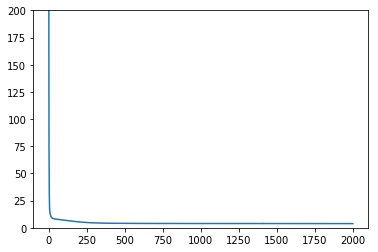

In [235]:
plt.plot(history.history['loss'])
plt.ylim([0,200])

In [236]:
min(history.history['loss'])

3.8642546500546864

In [0]:
#history=model.fit(X, Y,batch_size=32 ,epochs=10, verbose=1)
#man muss ewig trainieren!!!


In [237]:
model.evaluate(X,Y)

1245/1245 [==============================] - 0s 214us/sample - loss: 3.8774


3.877435417634895

In [0]:
#history=model.fit(X, Y,batch_size=32 ,epochs=5000, verbose=1)


In [0]:
#plt.plot(history.history['loss'])
#plt.ylim([40000,80000])

In [0]:
model_mean = tf.keras.models.Model(inputs=inputs, outputs=predictions.mean())
model_std = tf.keras.models.Model(inputs=inputs, outputs=predictions.stddev())

In [0]:
from tqdm import tqdm_notebook as tqdm

In [0]:
x_tst=np.arange(-20,40,0.2)
x_tst=x_tst.reshape((len(x_tst),1))

In [0]:
#x_tst=X
#x_tst=x_tst.reshape((len(x_tst),1))

In [243]:
n=200
n_preds=np.zeros((n,len(x_tst)))
for i in tqdm(range(0,n)):
  n_preds[i,:]=np.reshape(model_mean.predict(x_tst),len(x_tst))

In [244]:
n=200
n_preds_std=np.zeros((n,len(x_tst)))
for i in tqdm(range(0,n)):
  n_preds_std[i,:]=np.reshape(model_std.predict(x_tst),len(x_tst))

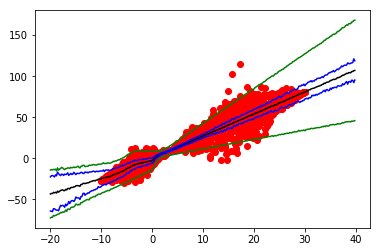

In [245]:
plt.plot(x_tst,np.mean(n_preds,axis=0),color="black")
plt.scatter(X,Y,color="red") #observerd 
plt.plot(x_tst,np.mean(n_preds,axis=0)+2*np.std(n_preds,axis=0),color="blue")
plt.plot(x_tst,np.mean(n_preds,axis=0)-2*np.std(n_preds,axis=0),color="blue")
plt.plot(x_tst,np.mean(n_preds,axis=0)+2*np.mean(n_preds_std,axis=0),color="green")
plt.plot(x_tst,np.mean(n_preds,axis=0)-2*np.mean(n_preds_std,axis=0),color="green")
#plt.ylim([-5,5])
#plt.ylim([-1.5,1.5])

### echten noise anstatt sinus daten generieren

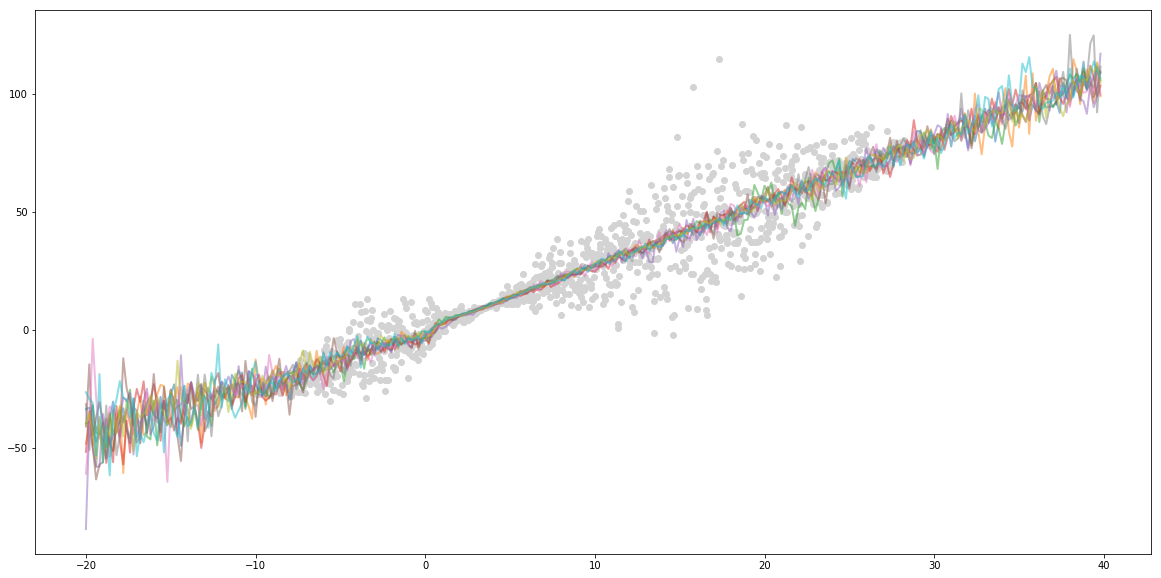

In [254]:
plt.figure(figsize=(20,10))
plt.scatter(X,Y,color="lightgrey") #observerd 
for i in range(0,10):
  plt.plot(x_tst,np.reshape(model_mean.predict(x_tst),len(x_tst)),linewidth=2.0,alpha=0.5)
#plt.ylim([-5,5])
#plt.ylim([-1.5,1.5])

### echten noise anstatt sinus daten generieren

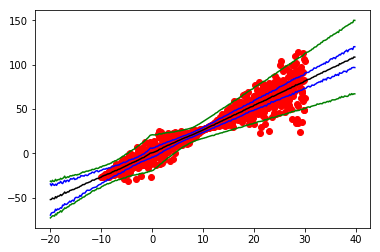

In [207]:
plt.plot(x_tst,np.mean(n_preds,axis=0),color="black")
plt.scatter(X,Y,color="red") #observerd 
plt.plot(x_tst,np.mean(n_preds,axis=0)+2*np.std(n_preds,axis=0),color="blue")
plt.plot(x_tst,np.mean(n_preds,axis=0)-2*np.std(n_preds,axis=0),color="blue")
plt.plot(x_tst,np.mean(n_preds,axis=0)+2*np.mean(n_preds_std,axis=0),color="green")
plt.plot(x_tst,np.mean(n_preds,axis=0)-2*np.mean(n_preds_std,axis=0),color="green")
#plt.ylim([-5,5])
#plt.ylim([-1.5,1.5])

### echten noise anstatt sinus daten generieren

In [0]:
#plt.scatter(X,Y,color="red") #observerd 
#plt.plot(x_tst,np.mean(n_preds,axis=0),color="black")
#plt.plot(x_tst,np.mean(n_preds,axis=0)+2*np.std(n_preds,axis=0),color="blue")
#plt.plot(x_tst,np.mean(n_preds,axis=0)-2*np.std(n_preds,axis=0),color="blue")
##plt.xlim([-5,30])
##plt.ylim([-5,10])